## Step 0: Import Libraries & Loading the Dataset

In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt                        
%matplotlib inline                               
import random

In [40]:
import requests, zipfile, io
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip'
target_path = 'Data.zip'

response = requests.get(url, stream=True)
handle = open(target_path, "wb")
for chunk in response.iter_content(chunk_size=512):
    if chunk:  # filter out keep-alive new chunks
        handle.write(chunk)
handle.close()
with zipfile.ZipFile('Data.zip', 'r') as zf:
    zf.extractall('Data')
    print('Done downloading and extraction')

Done downloading and extraction


In [41]:
dir='./Data'
training_file = dir+'/train.p'
validation_file= dir+'/valid.p'
testing_file = dir+'/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
 

## Step 1: Dataset Summary & Exploration


The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**




In [42]:
n_train = len(y_train)
n_validation = len(y_valid)
n_test = len(y_test)
image_shape = X_train.shape[1:3]
n_classes = max(y_train)-min(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


### Exploratory visualization of the dataset

Training Dataset


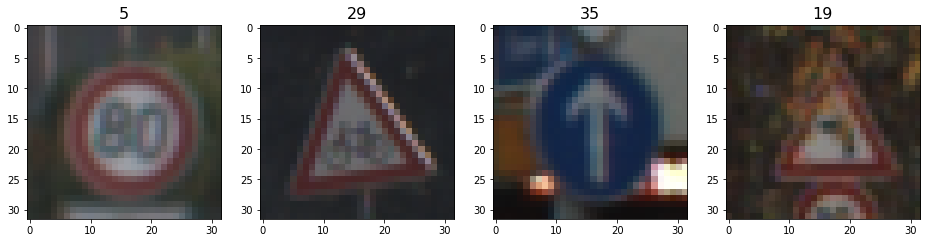

In [43]:
LENGTH  = 1
HEIGHT   = 4
%matplotlib inline                               
data_index=0
msg=['Training Dataset','Validation Dataset','Test Dataset']
images_data={0:X_train,1:X_valid,2:X_test}
labels_data={0:y_train,1:y_valid,2:y_test}
fig,axes = plt.subplots(LENGTH,HEIGHT,figsize=(16,16))
axes = axes.ravel()  
print(msg[data_index])
for i in np.arange(0,4):
    index=np.random.randint(0,len(images_data[data_index]))
    axes[i].imshow(images_data[data_index][index]);
    axes[i].set_title(labels_data[data_index][index],fontsize=16)
    

Validation Dataset


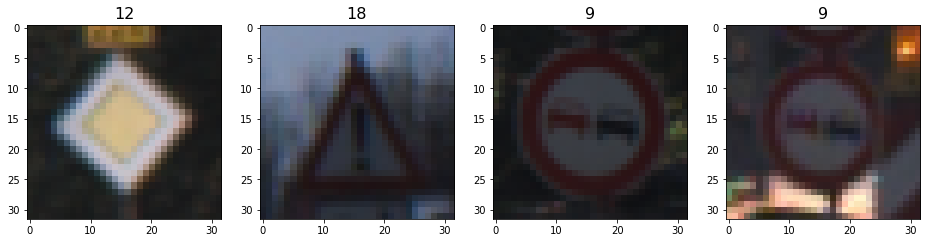

In [44]:
data_index=1
fig,axes = plt.subplots(LENGTH,HEIGHT,figsize=(16,16))
axes = axes.ravel()  
print(msg[data_index])
for i in np.arange(0,4):
    index=np.random.randint(0,len(images_data[data_index]))
    axes[i].imshow(images_data[data_index][index]);
    axes[i].set_title(labels_data[data_index][index],fontsize=16)
    

Test Dataset


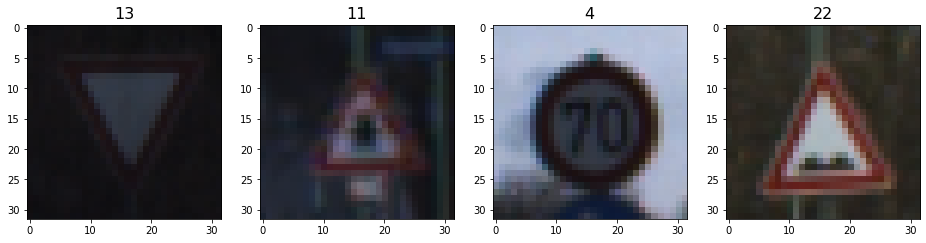

In [45]:
data_index=2
fig,axes = plt.subplots(LENGTH,HEIGHT,figsize=(16,16))
axes = axes.ravel()  
print(msg[data_index])
for i in np.arange(0,4):
    index=np.random.randint(0,len(images_data[data_index]))
    axes[i].imshow(images_data[data_index][index]);
    axes[i].set_title(labels_data[data_index][index],fontsize=16)

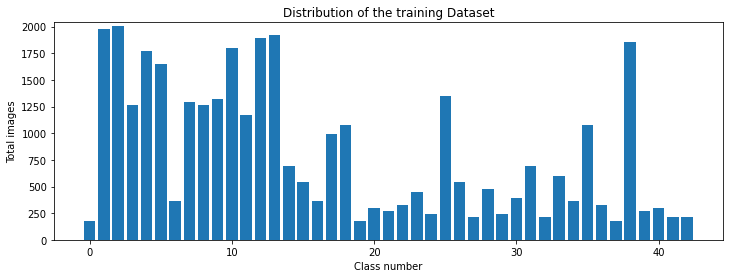

In [46]:
# Total samples in training DataSets
total_samples_per_class=[]
x=y_train
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
for i in range(0,n_classes):
  total_samples_per_class.append(len(get_indexes(i,x)))

#Ploting number of images per class
plt.figure(figsize=(12, 4))
plt.bar(range(0, n_classes), total_samples_per_class)
plt.title("Distribution of the training Dataset")
plt.xlabel("Class number")
plt.ylim((0,max(total_samples_per_class)+30))
plt.ylabel("Total images")
plt.show()


## Step 2: Design and Test a Model Architecture


### Pre-process the Data Set (normalization, grayscale, etc.)
Minimally, the image data is normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data. 

In [47]:
from sklearn.utils import shuffle
# Shuffling
X_train, y_train = shuffle(X_train, y_train)

# Change to gray scales
X_train_gray= np.sum(X_train/3,axis=3,keepdims=True)
X_valid_gray= np.sum(X_valid/3,axis=3,keepdims=True)
X_test_gray= np.sum(X_test/3,axis=3,keepdims=True)

# Normalizing the images
X_train_gray_normalize = (X_train_gray-128)/128
X_valid_gray_normalize = (X_valid_gray-128)/128
X_test_gray_normalize = (X_test_gray-128)/128

In [48]:
dataobjects={
    0:[X_train,X_train_gray,X_train_gray_normalize],
    1:[X_valid,X_valid_gray,X_valid_gray_normalize],
    2:[X_test,X_test_gray,X_test_gray_normalize]

}

Training Dataset


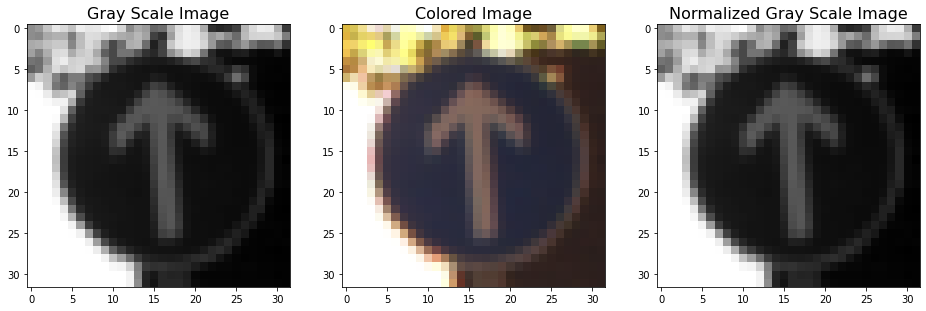

In [49]:
dataindex=0
print(msg[dataindex])
fig,axes = plt.subplots(1,3,figsize=(16,16))
axes = axes.ravel()  
index=np.random.randint(1, len(dataobjects[dataindex][1]))
axes[0].imshow(dataobjects[dataindex][1][index].squeeze(),cmap = 'gray');
axes[0].set_title("Gray Scale Image",fontsize=16)
axes[1].imshow(dataobjects[dataindex][0][index].squeeze(),cmap = 'gray');
axes[1].set_title("Colored Image",fontsize=16)
axes[2].imshow(dataobjects[dataindex][2][index].squeeze(),cmap = 'gray');
axes[2].set_title("Normalized Gray Scale Image",fontsize=16);

Validation Dataset


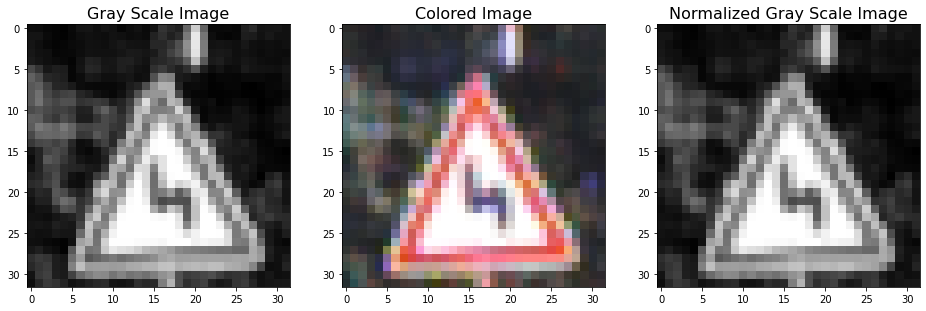

In [50]:
dataindex=1
print(msg[dataindex])
fig,axes = plt.subplots(1,3,figsize=(16,16))
axes = axes.ravel()  
index=np.random.randint(1, len(dataobjects[dataindex][1]))
axes[0].imshow(dataobjects[dataindex][1][index].squeeze(),cmap = 'gray');
axes[0].set_title("Gray Scale Image",fontsize=16)
axes[1].imshow(dataobjects[dataindex][0][index].squeeze(),cmap = 'gray');
axes[1].set_title("Colored Image",fontsize=16)
axes[2].imshow(dataobjects[dataindex][2][index].squeeze(),cmap = 'gray');
axes[2].set_title("Normalized Gray Scale Image",fontsize=16);

Test Dataset


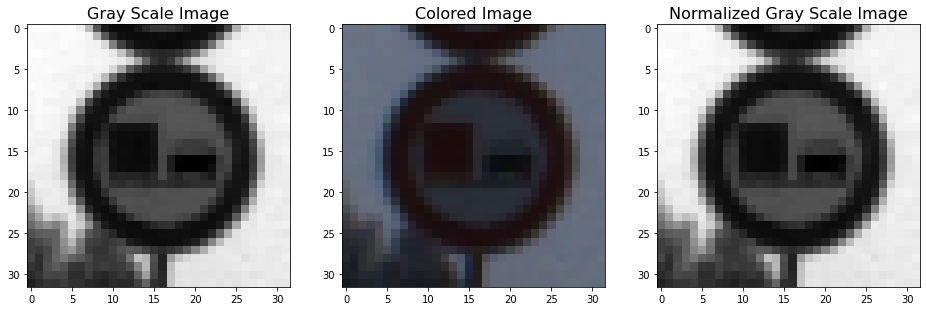

In [51]:
dataindex=2
print(msg[dataindex])
fig,axes = plt.subplots(1,3,figsize=(16,16))
axes = axes.ravel()  
index=np.random.randint(1, len(dataobjects[dataindex][1]))
axes[0].imshow(dataobjects[dataindex][1][index].squeeze(),cmap = 'gray');
axes[0].set_title("Gray Scale Image",fontsize=16)
axes[1].imshow(dataobjects[dataindex][0][index].squeeze(),cmap = 'gray');
axes[1].set_title("Colored Image",fontsize=16)
axes[2].imshow(dataobjects[dataindex][2][index].squeeze(),cmap = 'gray');
axes[2].set_title("Normalized Gray Scale Image",fontsize=16);

### Designing The LeNet Architecture

In [52]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [53]:
CNN = models.Sequential()

CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape=(32,32,1)))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Dropout(0.2))
CNN.add(layers.Conv2D(16,(5,5),activation='relu'))
CNN.add(layers.AveragePooling2D())
CNN.add(layers.Flatten())
CNN.add(layers.Dense(120,activation='relu'))
CNN.add(layers.Dense(84,activation='relu'))
CNN.add(layers.Dense(43,activation='softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               4

## Compiling the LeNet Model

### Using the Adam optimizer and sparse_categorical_crossentropy.
 
 "Accuracy" is our metric for measuring how well our model performs.


In [54]:
CNN.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [55]:
class LearningRateReducerCb(tf.keras.callbacks.Callback):

  def on_epoch_end(self, epoch, logs={}):
    old_lr = self.model.optimizer.lr.read_value()
    new_lr = old_lr * 0.99
    print("\nEpoch: {}. Reducing Learning Rate from {} to {} \n\n".format(epoch+1, old_lr, new_lr))
    self.model.optimizer.lr.assign(new_lr)

In [56]:
batch_size=256
n_epochs=60
training_data=CNN.fit(X_train_gray_normalize, y_train,
          batch_size=batch_size,
          epochs=n_epochs,
          verbose=1,
          callbacks=[LearningRateReducerCb()],
          validation_data=(X_valid_gray_normalize, y_valid),
          )

Epoch 1/60
136/136 [==============================] - ETA: 0s - loss: 2.7744 - accuracy: 0.2619
Epoch: 1. Reducing Learning Rate from 0.0010000000474974513 to 0.0009900000877678394 


136/136 [==============================] - 17s 125ms/step - loss: 2.7744 - accuracy: 0.2619 - val_loss: 1.8106 - val_accuracy: 0.4580
Epoch 2/60
136/136 [==============================] - ETA: 0s - loss: 1.2440 - accuracy: 0.6349
Epoch: 2. Reducing Learning Rate from 0.0009900000877678394 to 0.000980100128799677 


136/136 [==============================] - 17s 124ms/step - loss: 1.2440 - accuracy: 0.6349 - val_loss: 0.9772 - val_accuracy: 0.7057
Epoch 3/60
136/136 [==============================] - ETA: 0s - loss: 0.7810 - accuracy: 0.7711
Epoch: 3. Reducing Learning Rate from 0.000980100128799677 to 0.0009702991228550673 


136/136 [==============================] - 17s 124ms/step - loss: 0.7810 - accuracy: 0.7711 - val_loss: 0.7539 - val_accuracy: 0.7671
Epoch 4/60
136/136 [============================

### Visualizing the training and Validation loss and Accuracy.

In [59]:
training_data.history.keys()
accuracy = training_data.history['accuracy']
val_accuracy = training_data.history['val_accuracy']
loss = training_data.history['loss']
val_loss = training_data.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Losses')

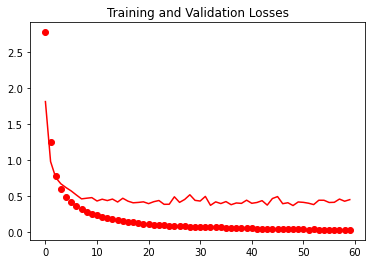

In [60]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Losses')


Text(0.5, 1.0, 'Training and Validation Accuracy')

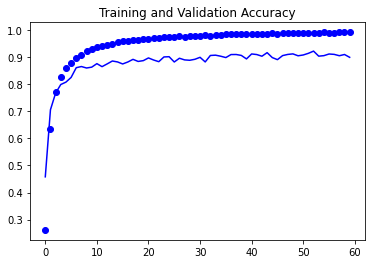

In [61]:
plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')


### Evaluating the model

Measuring the Test *Accuracy*

In [62]:
model_score = CNN.evaluate(X_test_gray_normalize, y_test)
print('Accuracy (Test): {}'.format(model_score[1]))

395/395 [==============================] - 4s 10ms/step - loss: 0.6250 - accuracy: 0.9100
Accuracy (Test): 0.9099762439727783


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


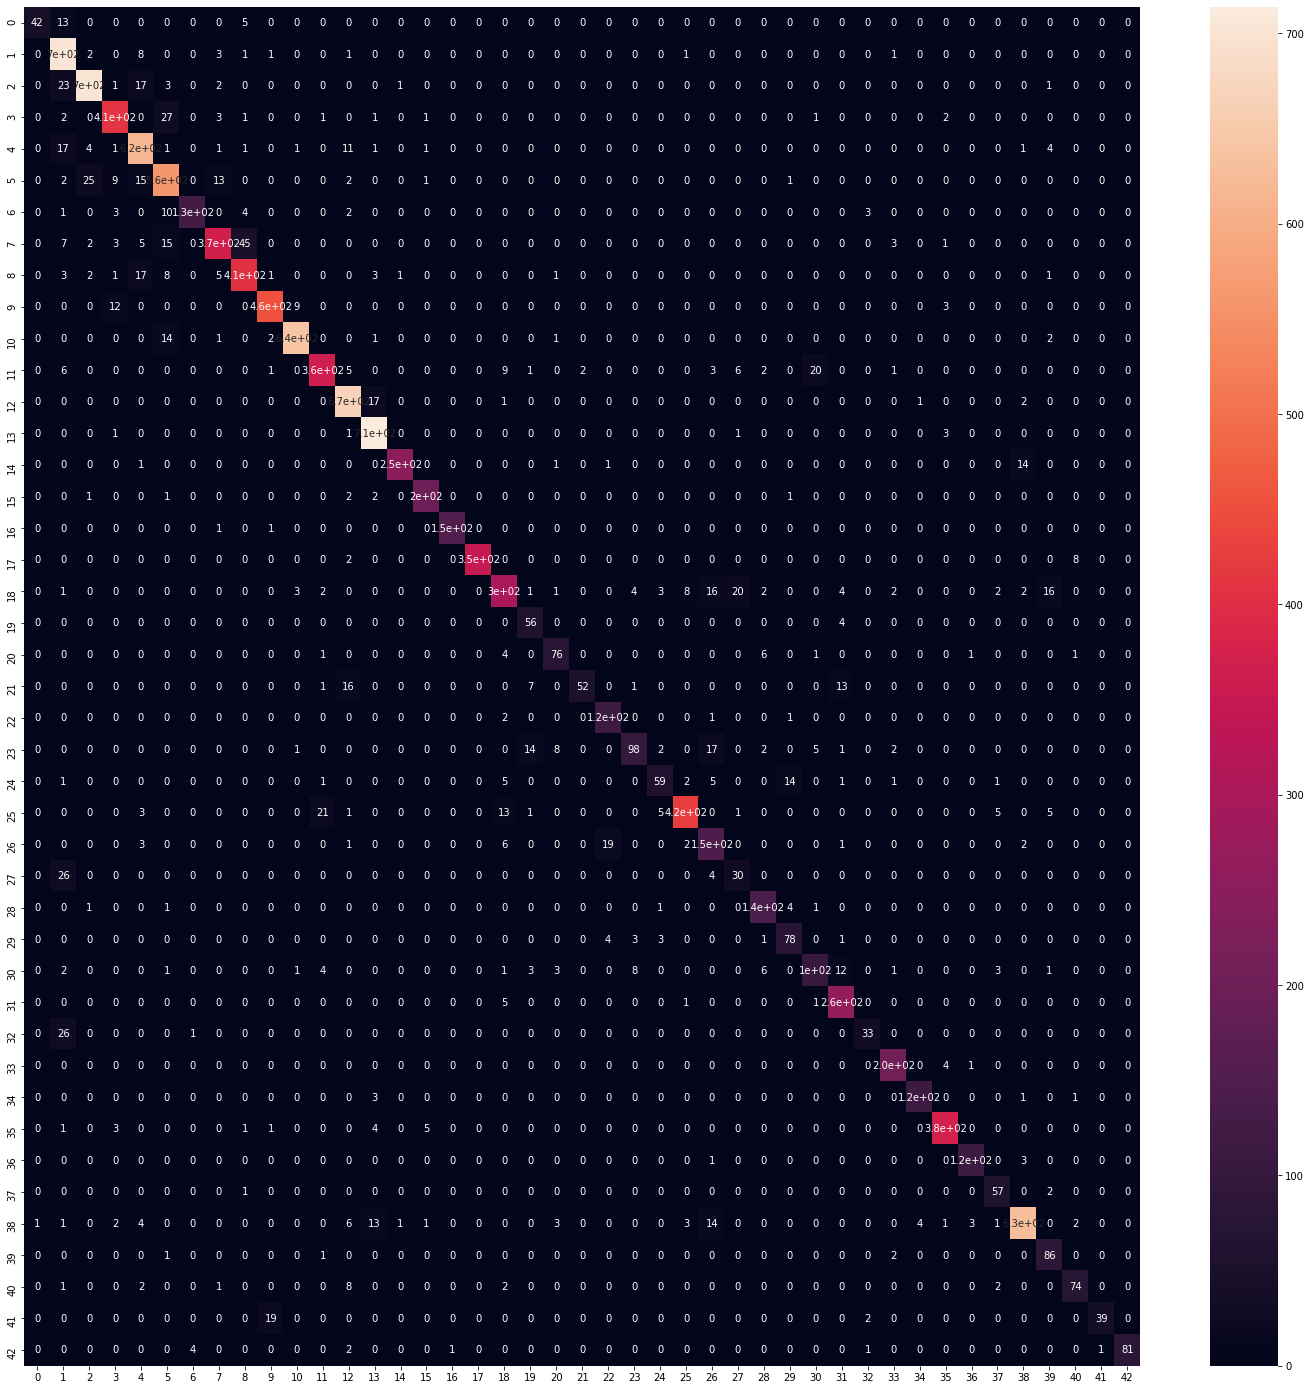

In [63]:
predicted_classes = CNN.predict_classes(X_test_gray_normalize)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)


## Visualizing the images from test data set



In [64]:
label_names=[
"Speed limit (20km/h)",
 "Speed limit (30km/h)",
"Speed limit (50km/h)",
"Speed limit (60km/h)",
"Speed limit (70km/h)",
"Speed limit (80km/h)",
"End of speed limit (80km/h)",
"Speed limit (100km/h)",
"Speed limit (120km/h)",
"No passing",
"No passing for vehicles over 3.5 metric tons",
 "Right-of-way at the next intersection",
"Priority road",
 "Yield",
 "Stop",
"No vehicles",
"Vehicles over 3.5 metric tons prohibited",
 "No entry",
 "General caution",
"Dangerous curve to the left",
 "Dangerous curve to the right",
"Double curve",
    "Bumpy road",
"Slippery road",
"Road narrows on the right",
"Road work",
"Traffic signals",
"Pedestrians",
    "Children crossing",
"Bicycles crossing",
"Beware of ice/snow",
"Wild animals crossing",
"End of all speed and passing limits",
"Turn right ahead",
"Turn left ahead",
"Ahead only",
"Go straight or right",
"Go straight or left",
"Keep right",
"Keep left",
"Roundabout mandatory",
"End of no passing",
 "End of no passing by vehicles over 3.5 metric tons",
]



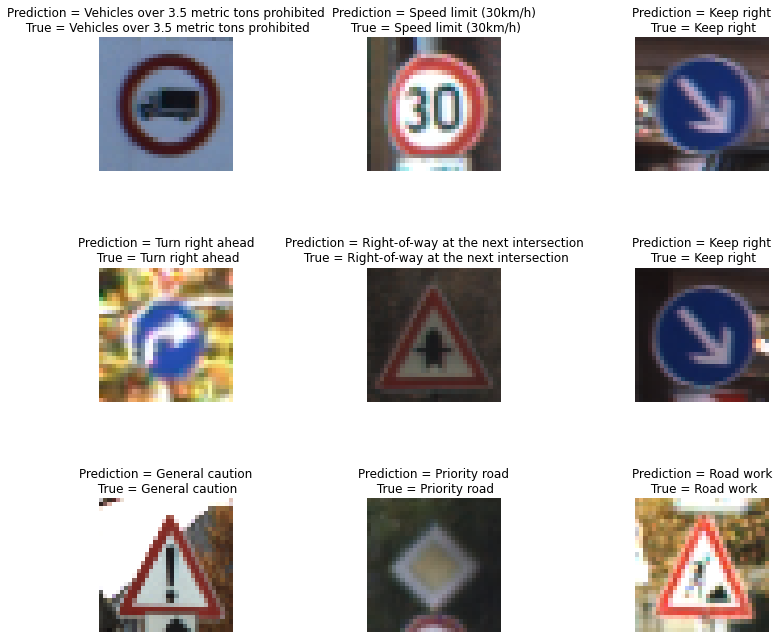

In [67]:
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_names[predicted_classes[i]], label_names[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

## The End 